# Dimentionality Reduction

Many Machine Learning problems involve thousands or even millions of
features for each training instance. Not only do all these features make training
extremely slow, but they can also make it much harder to find a good solution, as
we will see. This problem is often referred to as the curse of dimensionality.

Fortunately, in real-world problems, it is often possible to reduce the number of
features considerably, turning an intractable problem into a tractable one. For
example, consider the MNIST images (introduced in Chapter 3): the pixels on
the image borders are almost always white, so you could completely drop these
pixels from the training set without losing much information. Figure 7-6
confirms that these pixels are utterly unimportant for the classification task.
Additionally, two neighboring pixels are often highly correlated: if you merge
them into a single pixel (e.g., by taking the mean of the two pixel intensities),
you will not lose much information.

### Warning
Reducing dimensionality does cause some information loss (just like compressing an image to
JPEG can degrade its quality), so even though it will speed up training, it may make your
system perform slightly worse. It also makes your pipelines a bit more complex and thus
harder to maintain. So, if training is too slow, you should first try to train your system with the
original data before considering using dimensionality reduction. In some cases, reducing the
dimensionality of the training data may filter out some noise and unnecessary details and thus
result in higher performance, but in general it won’t; it will just speed up training.

Apart from speeding up training, dimensionality reduction is also extremely
useful for data visualization (or DataViz). Reducing the number of dimensions
down to two (or three) makes it possible to plot a condensed view of a high-
dimensional training set on a graph and often gain some important insights by
visually detecting patterns, such as clusters. Moreover, DataViz is essential to
communicate your conclusions to people who are not data scientists—in particular, decision makers who will use your results.

#### Then, we will consider the two main approaches
to dimensionality reduction (projection and Manifold Learning), and
we will go through three of the most popular dimensionality reduction
techniques: PCA, Kernel PCA, and LLE.

### Curse of dimentionality
 As a result, high-dimensional datasets
are at risk of being very sparse: most training instances are likely to be far away
from each other. This also means that a new instance will likely be far away
from any training instance, making predictions much less reliable than in lower
dimensions, since they will be based on much larger extrapolations. In short, the
more dimensions the training set has, the greater the risk of overfitting it.

## Main Approaches for Dimensionality Reduction

Before we dive into specific dimensionality reduction algorithms, let’s take a
look at the two main approaches to reducing dimensionality: projection and
Manifold Learning.

### Projection

In most real-world problems, training instances are not spread out uniformly
across all dimensions. Many features are almost constant, while others are highly
correlated (as discussed earlier for MNIST). As a result, all training instances lie
within (or close to) a much lower-dimensional subspace of the high-dimensional
space. This sounds very abstract, so let’s look at an example. In Figure 8-2 you
can see a 3D dataset represented by circles

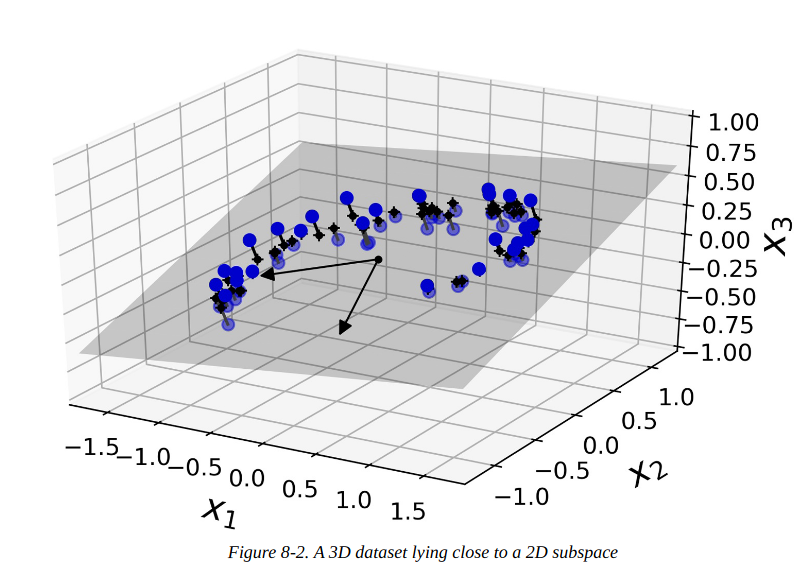

Notice that all training instances lie close to a plane: this is a lower-dimensional
(2D) subspace of the high-dimensional (3D) space. If we project every training
instance perpendicularly onto this subspace (as represented by the short lines
connecting the instances to the plane), we get the new 2D dataset shown in
Figure 8-3. Ta-da! We have just reduced the dataset’s dimensionality from 3D to
2D. Note that the axes correspond to new features z  and z  (the coordinates of
the projections on the plane).

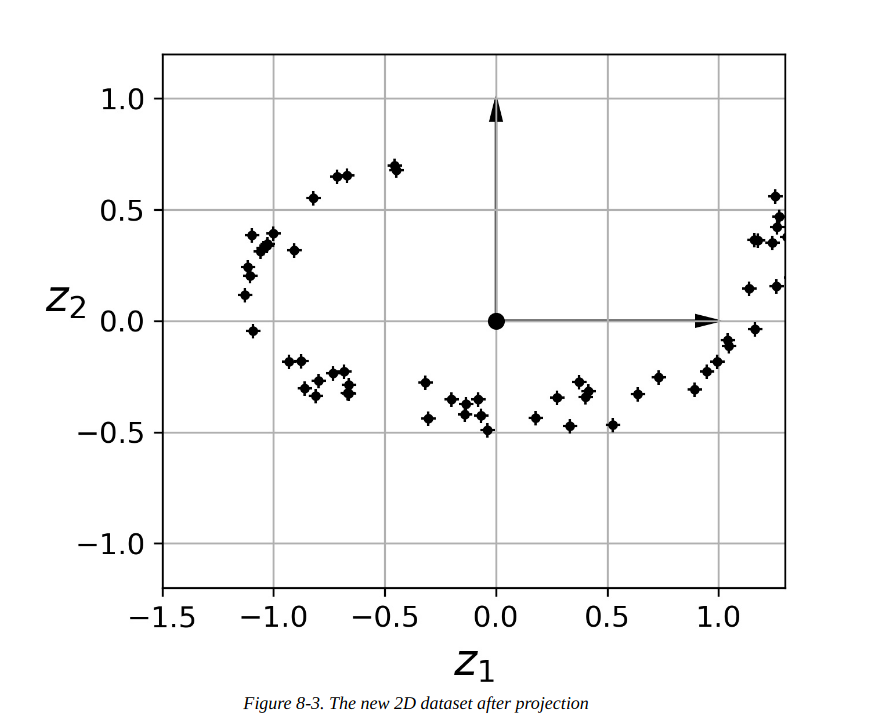

However, projection is not always the best approach to dimensionality reduction.
In many cases the subspace may twist and turn, such as in the famous Swiss roll
toy dataset represented in Figure 8-4.

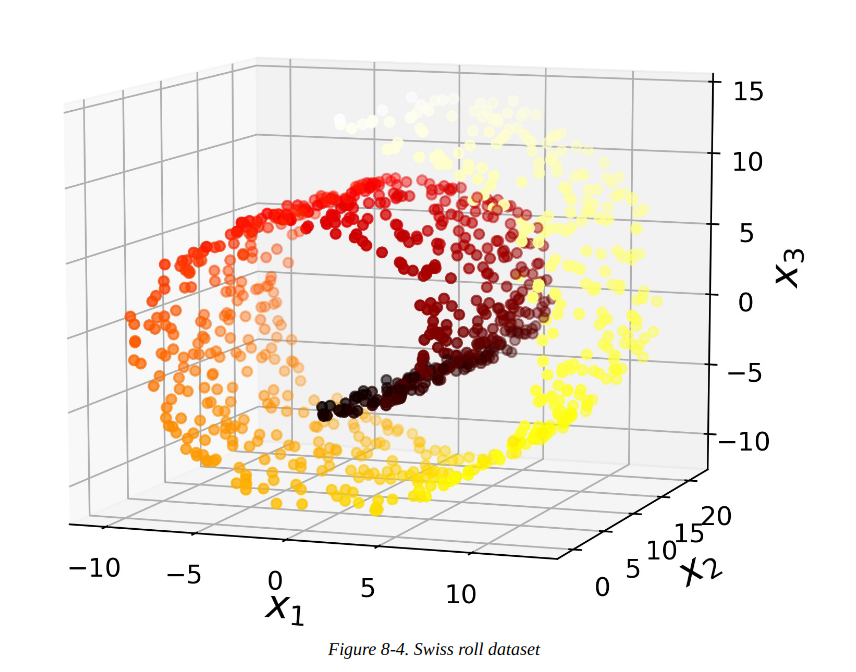

Simply projecting onto a plane (e.g., by dropping x ) would squash different
layers of the Swiss roll together, as shown on the left side of Figure 8-5. What
you really want is to unroll the Swiss roll to obtain the 2D dataset on the right
side of Figure 8-5.

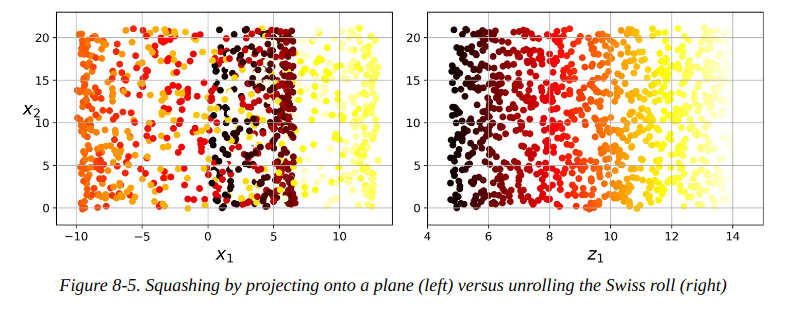

### Manifold Learning

The Swiss roll is an example of a 2D manifold. Put simply, a 2D manifold is a
2D shape that can be bent and twisted in a higher-dimensional space. More
generally, a d-dimensional manifold is a part of an n-dimensional space (where d
< n) that locally resembles a d-dimensional hyperplane. In the case of the Swiss
roll, d = 2 and n = 3: it locally resembles a 2D plane, but it is rolled in the third
dimension.

## PCA

Principal Component Analysis (PCA) is by far the most popular dimensionality
reduction algorithm. First it identifies the hyperplane that lies closest to the data,
and then it projects the data onto it, just like in Figure 8-2.

### Preserving the Variance

Before you can project the training set onto a lower-dimensional hyperplane, you first need to choose the right hyperplane. For example, a simple 2D dataset is
represented on the left in Figure 8-7, along with three different axes (i.e., 1D
hyperplanes). On the right is the result of the projection of the dataset onto each
of these axes. As you can see, the projection onto the solid line preserves the
maximum variance, while the projection onto the dotted line preserves very little
variance and the projection onto the dashed line preserves an intermediate
amount of variance.

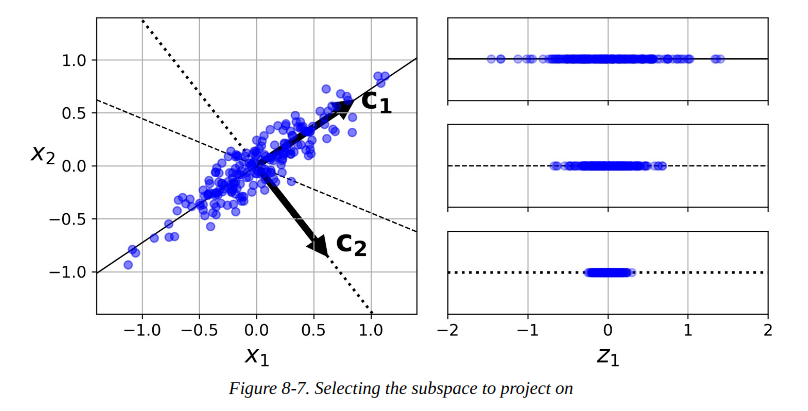

It seems reasonable to select the axis that preserves the maximum amount of
variance, as it will most likely lose less information than the other projections.
Another way to justify this choice is that it is the axis that minimizes the mean
squared distance between the original dataset and its projection onto that axis.
This is the rather simple idea behind PCA.

### Principal Components

PCA identifies the axis that accounts for the largest amount of variance in the
training set. In Figure 8-7, it is the solid line. It also finds a second axis,
orthogonal to the first one, that accounts for the largest amount of remaining
variance. In this 2D example there is no choice: it is the dotted line. If it were a
higher-dimensional dataset, PCA would also find a third axis, orthogonal to both
previous axes, and a fourth, a fifth, and so on—as many axes as the number of
dimensions in the dataset.

The i  axis is called the i  principal component (PC) of the data. In Figure 8-7,
the first PC is the axis on which vector c  lies, and the second PC is the axis on
which vector c  lies. In Figure 8-2 the first two PCs are the orthogonal axes on
which the two arrows lie, on the plane, and the third PC is the axis orthogonal to
that plane.

### Note
For each principal component, PCA finds a zero-centered unit vector pointing in the direction
of the PC. Since two opposing unit vectors lie on the same axis, the direction of the unit
vectors returned by PCA is not stable: if you perturb the training set slightly and run PCA
again, the unit vectors may point in the opposite direction as the original vectors. However,
they will generally still lie on the same axes. In some cases, a pair of unit vectors may even
rotate or swap (if the variances along these two axes are close), but the plane they define will
generally remain the same.

So how can you find the principal components of a training set? Luckily, there is
a standard matrix factorization technique called Singular Value Decomposition
(SVD) that can decompose the training set matrix X into the matrix
multiplication of three matrices U Σ V , where V contains the unit vectors that
define all the principal components that we are looking for, as shown in Equation
8-1.

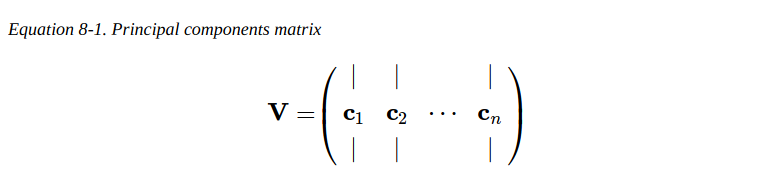

The following Python code uses NumPy’s svd() function to obtain all the
principal components of the training set, then extracts the two unit vectors that
define the first two PCs:

In [25]:
import numpy as np
from sklearn.datasets import fetch_california_housing

np.set_printoptions(suppress=True)

data = fetch_california_housing()
X = data.data[:8000]


In [26]:
X_centered = X - X.mean(axis=0)
# U, s, Vt = np.linalg.svd(X_centered)
# c1 = Vt.T[:, 0]
# c2 = Vt.T[:, 1]


### WARNING

PCA assumes that the dataset is centered around the origin. As we will see, Scikit-Learn’s PCA
classes take care of centering the data for you. If you implement PCA yourself (as in the
preceding example), or if you use other libraries, don’t forget to center the data first.

### Projecting Down to d Dimensions

Once you have identified all the principal components, you can reduce the
dimensionality of the dataset down to d dimensions by projecting it onto the
hyperplane defined by the first d principal components. Selecting this
hyperplane ensures that the projection will preserve as much variance as
possible. For example, in Figure 8-2 the 3D dataset is projected down to the 2D
plane defined by the first two principal components, preserving a large part of
the dataset’s variance. As a result, the 2D projection looks very much like the
original 3D dataset.

To project the training set onto the hyperplane and obtain a reduced dataset X
 of dimensionality d, compute the matrix multiplication of the training set
matrix X by the matrix W , defined as the matrix containing the first d columns
of V, as shown in Equation 8-2.

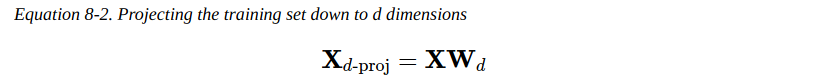

The following Python code projects the training set onto the plane defined by the
first two principal components:

In [3]:
# W2 = Vt.T[:, :2]
# X2D = X_centered.dot(W2)

### Using Scikit-Learn

Scikit-Learn’s PCA class uses SVD decomposition to implement PCA, just like
we did earlier in this chapter. The following code applies PCA to reduce the
dimensionality of the dataset down to two dimensions (note that it automatically
takes care of centering the data):

In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X2D = pca.fit_transform(X)

### Explained Variance Ratio

Another useful piece of information is the explained variance ratio of each
principal component, available via the explained_variance_ratio_ variable.
The ratio indicates the proportion of the dataset’s variance that lies along each
principal component. For example, let’s look at the explained variance ratios of
the first two components of the 3D dataset represented below

In [30]:
pca.explained_variance_ratio_

array([0.99980813, 0.0001279 , 0.00004511])

This output tells you that 99% of the dataset’s variance lies along the first PC,
and 0,01% lies along the second PC. This leaves less than 0% for the third PC,
so it is reasonable to assume that the third PC probably carries little information.

### Choosing the Right Number of Dimensions

The following code performs PCA without reducing dimensionality, then computes the minimum number of dimensions required to preserve 95% of the
training set’s variance:

In [32]:
pca = PCA()
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1
d

1

You could then set n_components=d and run PCA again. But there is a much
better option: instead of specifying the number of principal components you
want to preserve, you can set n_components to be a float between 0.0 and 1.0,
indicating the ratio of variance you wish to preserve:

In [33]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X)

Yet another option is to plot the explained variance as a function of the number
of dimensions (simply plot cumsum; see Figure 8-8). There will usually be an
elbow in the curve, where the explained variance stops growing fast. In this case,
you can see that reducing the dimensionality down to about 100 dimensions
wouldn’t lose too much explained variance.

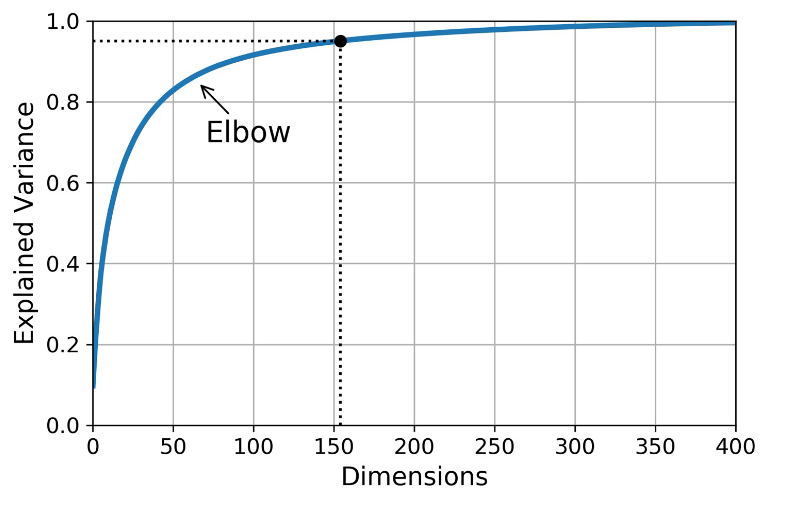

### PCA for Compression